# <a name="0">Hierarchical Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [33]:
#read the data

data_path = 'CC GENERAL.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

### check null values in each column

In [34]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

* CREDIT_LIMIT , MINIMUM_PAYMENTS have null values

In [35]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

* CREDIT_LIMIT has 0.01% null values
* MINIMUM_PAYMENTS has 3.5% null values

In [36]:
# This will print basic statistics for numerical columns
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [37]:
# feel free to investigate what you want

### check if each column has the proper data type

In [38]:
count_dismatch = 0
for col in df.columns:
    if df[col].dtypes in ['object']:
        if df[col].str.isnumeric().any(): count_dismatch+= 1
print(count_dismatch)

0


### check outliers

<AxesSubplot:>

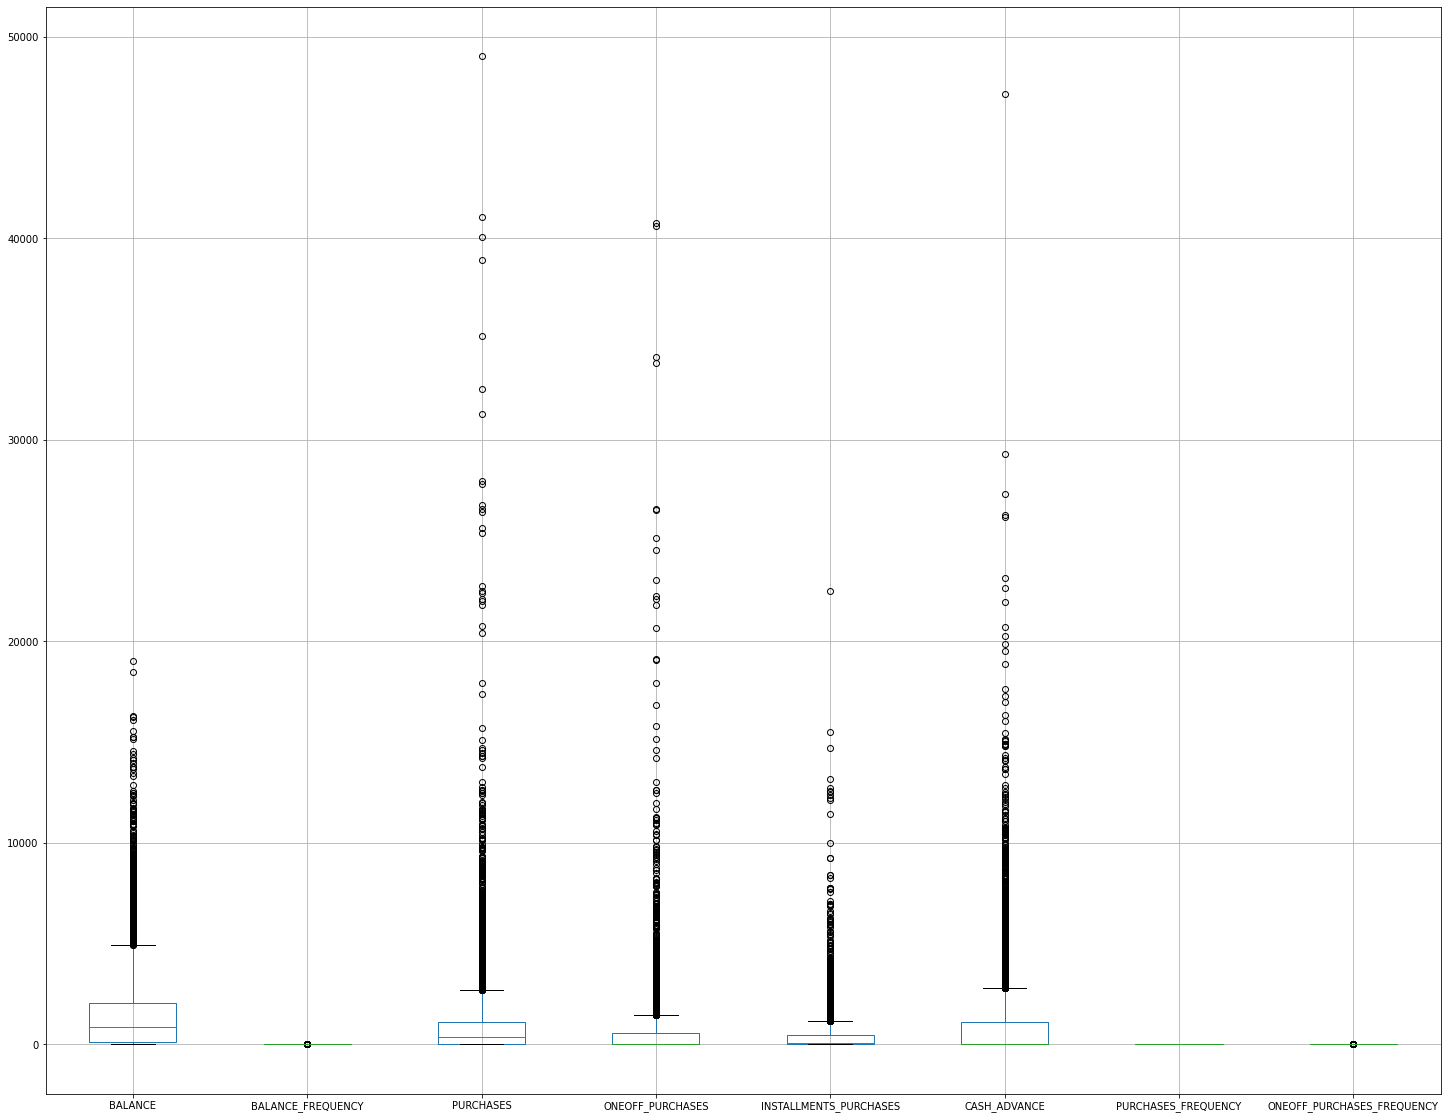

In [39]:
df.iloc[:,:9].boxplot(figsize=(25,20)) 

<AxesSubplot:>

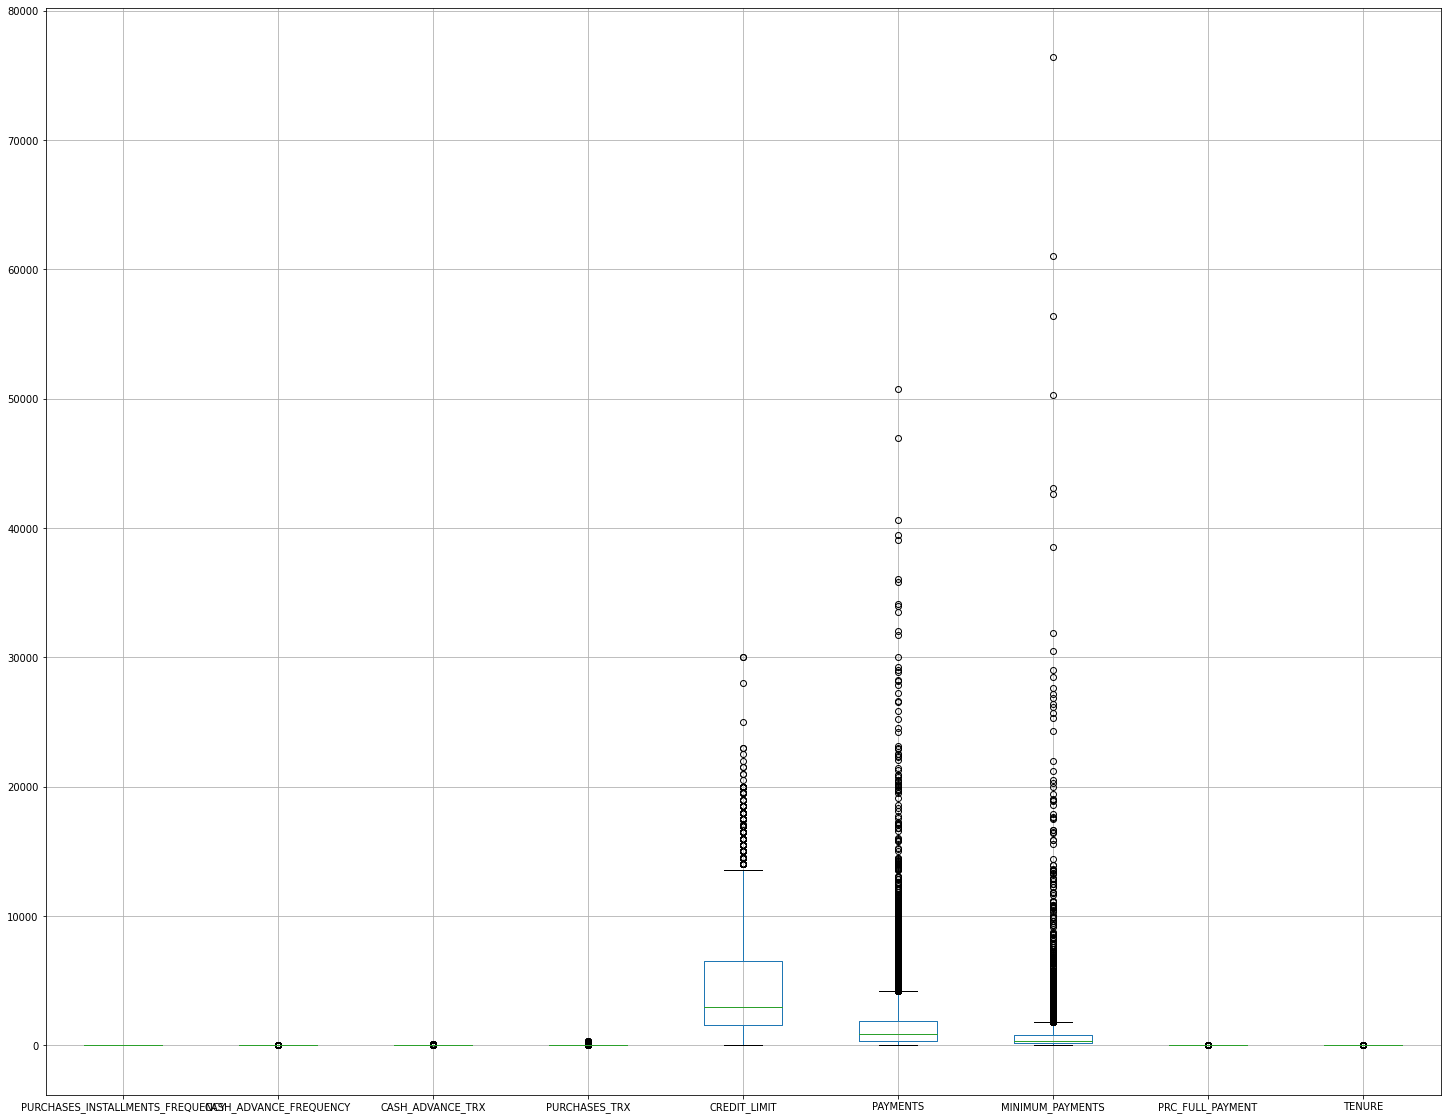

In [40]:
df.iloc[:,9:].boxplot(figsize=(25,20)) 

* data has outliers

In [41]:
outliers = {}
def check_outliers():
    for col in df.columns[1:]:
        sorted_series = df[col].sort_values()
        q1, q3= np.percentile(sorted_series,[25,75])
        iqr = q3 - q1
        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)
        number_of_outliers =  sum(np.logical_or(df[col]<lower_bound, df[col]>upper_bound))
        outliers[col] = number_of_outliers
        print(col, number_of_outliers)
check_outliers()

BALANCE 695
BALANCE_FREQUENCY 1493
PURCHASES 808
ONEOFF_PURCHASES 1013
INSTALLMENTS_PURCHASES 867
CASH_ADVANCE 1030
PURCHASES_FREQUENCY 0
ONEOFF_PURCHASES_FREQUENCY 782
PURCHASES_INSTALLMENTS_FREQUENCY 0
CASH_ADVANCE_FREQUENCY 525
CASH_ADVANCE_TRX 804
PURCHASES_TRX 766
CREDIT_LIMIT 0
PAYMENTS 808
MINIMUM_PAYMENTS 0
PRC_FULL_PAYMENT 1474
TENURE 1366


### check duplicate rows

In [42]:
df[df.duplicated()].count()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

* No duplicated rows

### check distribution for each column (skewness)

In [43]:
df.skew()

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

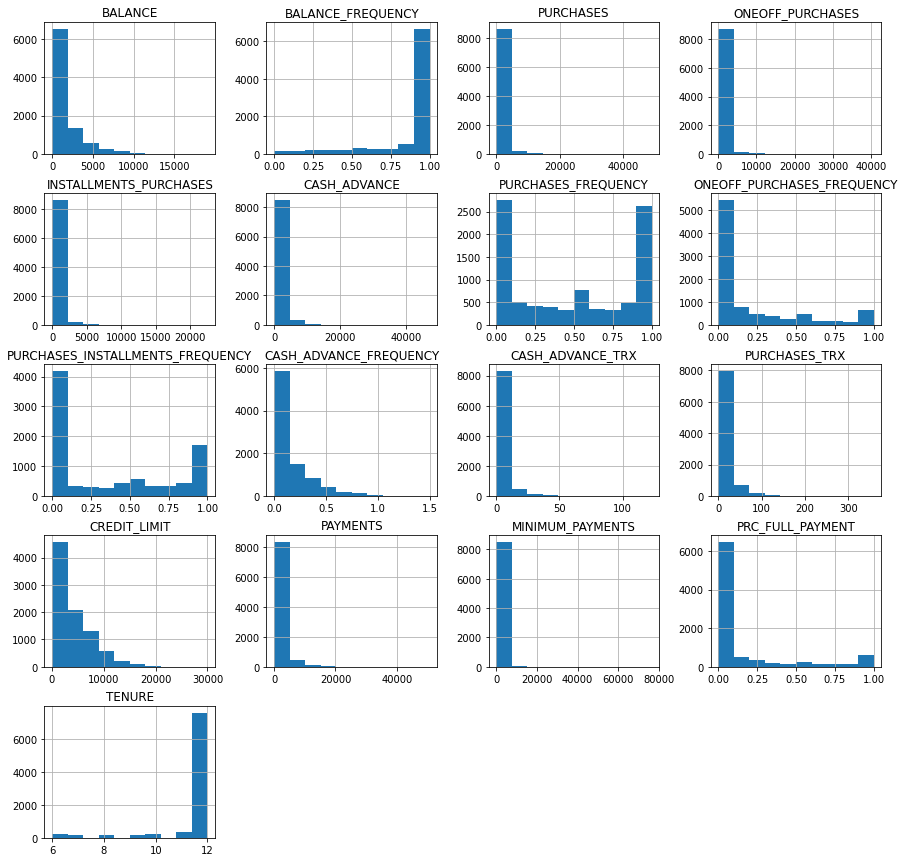

In [44]:
df.hist(figsize = (15,15))

* Data has severe skewness

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- CREDIT_LIMIT , MINIMUM_PAYMENTS have null values <br>
2- data has outliers <br>
3- Data has severe skewness

In [45]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [46]:
#solution: fill null values with column mean 
df['CREDIT_LIMIT'].fillna(np.mean(df['CREDIT_LIMIT']), inplace = True)
df['MINIMUM_PAYMENTS'].fillna(np.mean(df['MINIMUM_PAYMENTS']), inplace= True)


In [47]:
#test 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

**Second issue**

In [48]:
#solution: cube root transformation for 2nd, 3rd issues
for key,value in outliers.items():
    if outliers[key]>0:
        df[key] =(df[key]**(1/3))

In [49]:
#test
check_outliers()

BALANCE 12
BALANCE_FREQUENCY 1716
PURCHASES 90
ONEOFF_PURCHASES 50
INSTALLMENTS_PURCHASES 22
CASH_ADVANCE 14
PURCHASES_FREQUENCY 0
ONEOFF_PURCHASES_FREQUENCY 0
PURCHASES_INSTALLMENTS_FREQUENCY 0
CASH_ADVANCE_FREQUENCY 0
CASH_ADVANCE_TRX 10
PURCHASES_TRX 82
CREDIT_LIMIT 248
PAYMENTS 269
MINIMUM_PAYMENTS 774
PRC_FULL_PAYMENT 0
TENURE 1366


In [50]:
#test 
df.skew()

BALANCE                              0.295005
BALANCE_FREQUENCY                   -3.756455
PURCHASES                            0.471128
ONEOFF_PURCHASES                     0.961342
INSTALLMENTS_PURCHASES               0.609720
CASH_ADVANCE                         0.825680
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           0.365089
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               0.382068
CASH_ADVANCE_TRX                     0.701759
PURCHASES_TRX                        0.195528
CREDIT_LIMIT                         1.522549
PAYMENTS                             0.885136
MINIMUM_PAYMENTS                    13.867357
PRC_FULL_PAYMENT                     1.017735
TENURE                              -3.107796
dtype: float64

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

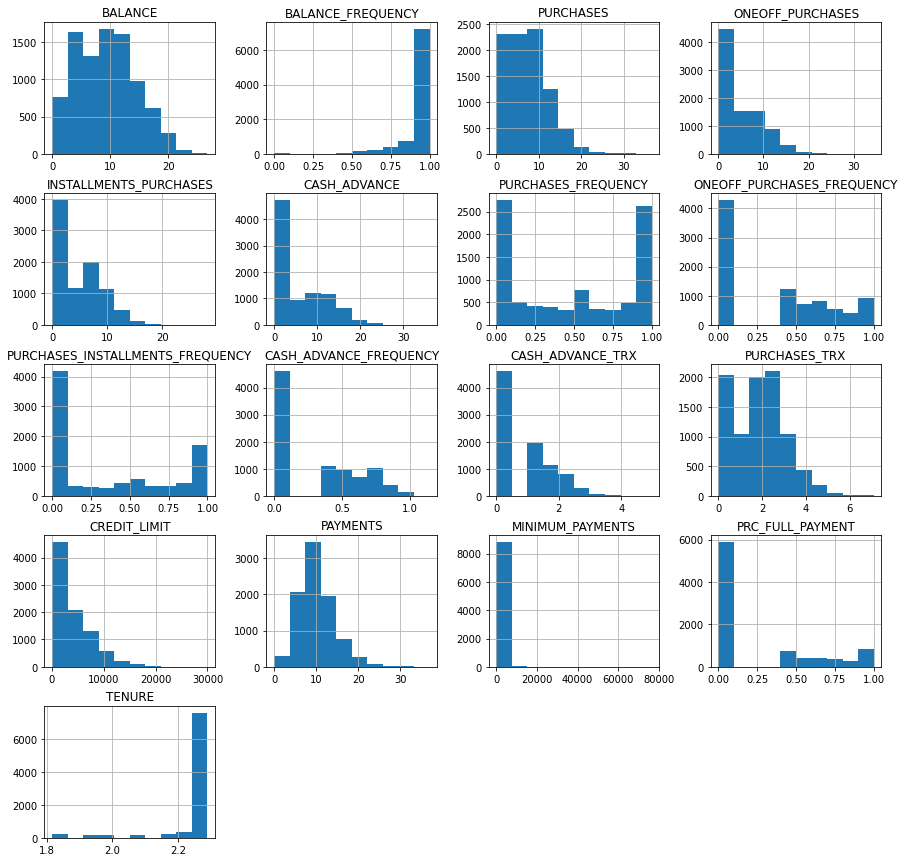

In [51]:
df.hist(figsize = (15,15))

In [52]:
# drop columns with below -1 or above 1 skewness after transformation
df.drop(['BALANCE_FREQUENCY', 'CREDIT_LIMIT', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],axis = 1 ,inplace = True)

In [53]:
df

,CUST_ID,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS
0,C10001,3.445433,4.569298,0.000000,4.569298,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,1.259921,5.865547
1,C10002,14.739913,0.000000,0.000000,0.000000,18.607791,0.000000,0.000000,0.000000,0.629961,1.587401,0.000000,16.009152
2,C10003,13.563304,9.178217,9.178217,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.289428,8.536483
3,C10004,11.856320,11.444598,11.444598,0.000000,5.903914,0.083333,0.436790,0.000000,0.436790,1.000000,1.000000,0.000000
4,C10005,9.351197,2.519842,2.519842,0.000000,0.000000,0.083333,0.436790,0.000000,0.000000,0.000000,1.000000,8.786475
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,3.054326,6.627616,0.000000,6.627616,0.000000,1.000000,0.000000,0.833333,0.000000,0.000000,1.817121,6.879534
8946,C19187,2.676951,6.694330,0.000000,6.694330,0.000000,1.000000,0.000000,0.833333,0.000000,0.000000,1.817121,6.509739
8947,C19188,2.860204,5.246332,0.000000,5.246332,0.000000,0.833333,0.000000,0.666667,0.000000,0.000000,1.709976,4.331565
8948,C19189,2.378604,0.000000,0.000000,0.000000,3.318923,0.000000,0.000000,0.000000,0.550322,1.259921,0.000000,3.745624


In [54]:
#drop categorical column
df.drop(['CUST_ID'],axis = 1 ,inplace = True)

In [55]:
df

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS
0,3.445433,4.569298,0.000000,4.569298,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,1.259921,5.865547
1,14.739913,0.000000,0.000000,0.000000,18.607791,0.000000,0.000000,0.000000,0.629961,1.587401,0.000000,16.009152
2,13.563304,9.178217,9.178217,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.289428,8.536483
3,11.856320,11.444598,11.444598,0.000000,5.903914,0.083333,0.436790,0.000000,0.436790,1.000000,1.000000,0.000000
4,9.351197,2.519842,2.519842,0.000000,0.000000,0.083333,0.436790,0.000000,0.000000,0.000000,1.000000,8.786475
...,...,...,...,...,...,...,...,...,...,...,...,...
8945,3.054326,6.627616,0.000000,6.627616,0.000000,1.000000,0.000000,0.833333,0.000000,0.000000,1.817121,6.879534
8946,2.676951,6.694330,0.000000,6.694330,0.000000,1.000000,0.000000,0.833333,0.000000,0.000000,1.817121,6.509739
8947,2.860204,5.246332,0.000000,5.246332,0.000000,0.833333,0.000000,0.666667,0.000000,0.000000,1.709976,4.331565
8948,2.378604,0.000000,0.000000,0.000000,3.318923,0.000000,0.000000,0.000000,0.550322,1.259921,0.000000,3.745624


In [56]:
df.skew()

BALANCE                             0.295005
PURCHASES                           0.471128
ONEOFF_PURCHASES                    0.961342
INSTALLMENTS_PURCHASES              0.609720
CASH_ADVANCE                        0.825680
PURCHASES_FREQUENCY                 0.060164
ONEOFF_PURCHASES_FREQUENCY          0.365089
PURCHASES_INSTALLMENTS_FREQUENCY    0.509201
CASH_ADVANCE_FREQUENCY              0.382068
CASH_ADVANCE_TRX                    0.701759
PURCHASES_TRX                       0.195528
PAYMENTS                            0.885136
dtype: float64

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>]], dtype=object)

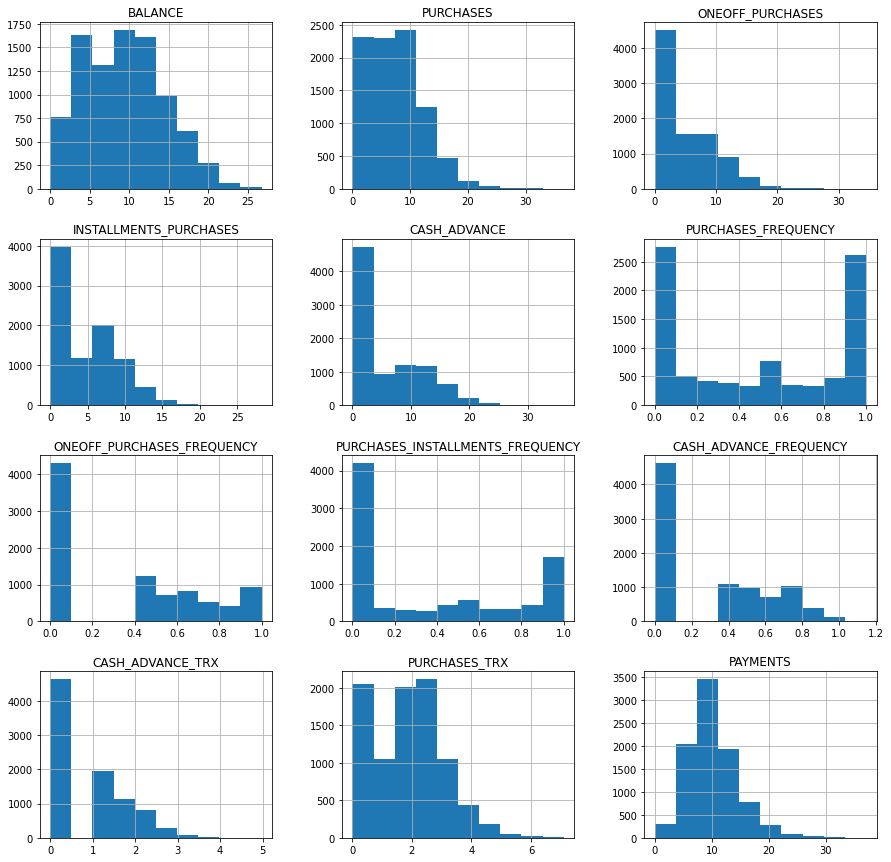

In [57]:
df.hist(figsize=(15,15))

In [58]:
check_outliers()

PURCHASES 90
ONEOFF_PURCHASES 50
INSTALLMENTS_PURCHASES 22
CASH_ADVANCE 14
PURCHASES_FREQUENCY 0
ONEOFF_PURCHASES_FREQUENCY 0
PURCHASES_INSTALLMENTS_FREQUENCY 0
CASH_ADVANCE_FREQUENCY 0
CASH_ADVANCE_TRX 10
PURCHASES_TRX 82
PAYMENTS 269


In [62]:
df.shape

(8950, 12)

In [64]:
df.to_csv('CC GENERAL_preprocessed.csv',  index=False)

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Answer here:

In [41]:
from sklearn import preprocessing

In [50]:
# Normalization as df is not normally distributed
from sklearn.preprocessing import MinMaxScaler
for col in df.columns:
    data = df[col].values.reshape(-1,1)
    scaler = MinMaxScaler()
    # transform data
    scaled = scaler.fit_transform(data)
    df[col] = scaled

## 5. <a name="5">K Means</a>
(<a href="#5">Go to top</a>)

1- Use the k means class that you implemented in the previous task to cluster this data <br>
2- Use http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and see if the difference in the result <br>
3- Use elbow method to determine 
the K (plot the result using two plot one for distorion and another for inertia) <br>
4- (Optionally) make a method that pick the best number of clusters for you <br>
5- Using different techniques for scaling and comment on the result <br>

In [51]:
#1

In [167]:
class kmeans:
    def __init__(self,iterations,X,K):
        self.iterations=iterations
        self.X=X
        self.K=K
        
    def kMeansInitCentroids(self):
        centroids = np.empty((self.K,self.X.shape[1]))
        for i in range(self.K):
            centroids[i] = (self.X[np.random.choice(self.X.shape[0], 1, replace=False)])[0].tolist()
        return centroids
    
    def findClosestCentroids(self,centroids):
        idx = []
        distance = []
        for i in range(self.X.shape[0]):
            for j in range(len(centroids)):
                distance.append(np.sqrt(np.sum((self.X[i]-centroids[j])**2)))
                #distance.append(np.sqrt(np.sum(np.square(X[i]-centroids[j]))))

            idx.append( (distance.index(min(distance))))
            distance = []

        return idx
    
    
    def computeCentroids(self,idx):
        centroids = np.empty((self.K, self.X.shape[1]))
        for i in range(0,self.K):
            data = []
            for j in range(len(idx)):
                if idx[j] == i:
                    data.append(self.X[j])

            centroids[i] = np.sum(data, axis = 0) / len(data)
            #centroids[i] = (np.mean(data, axis = 0))


        return centroids
    
    def predict(self,centroids):
        labels = []
        for i in range(X.shape[0]):
            labels.append(findClosestCentroids(X, centroids)[i])
        return labels
    
  
    
    def stop_iterating(self,centroids, oldCentroids):
        return np.allclose(centroids,oldCentroids)
    
    def fit(self):
        centroids = self.kMeansInitCentroids()
        for i in range(self.iterations):
            idx = self.findClosestCentroids(centroids)
            oldCentroids = centroids
            centroids = self.computeCentroids(idx)

            if self.stop_iterating(centroids, oldCentroids):
                break
        return centroids, idx


In [53]:
obj = kmeans(100,df.values,3)

In [54]:
centroids, idx = obj.fit()

In [55]:
centroids

array([[0.33463223, 0.29517379, 0.16536101, 0.31627923, 0.08823816,
        0.91760986, 0.4231677 , 0.8350595 , 0.15820289, 0.10070751,
        0.40931032, 0.29791643],
       [0.44268982, 0.04762139, 0.03843537, 0.01977704, 0.31080191,
        0.0609121 , 0.11307202, 0.02512778, 0.5495479 , 0.34533356,
        0.05714603, 0.27706618],
       [0.27411466, 0.21860783, 0.18483123, 0.10304089, 0.04385999,
        0.41653594, 0.50953992, 0.14446241, 0.08612021, 0.05143678,
        0.26254269, 0.24166546]])

In [56]:
#2

### kmeans sklearn

In [76]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters= 3)
model.fit(df)

KMeans(n_clusters=3)

In [77]:
centroids = model.cluster_centers_
centroids

array([[0.27445676, 0.21864073, 0.18494851, 0.10290795, 0.04418173,
        0.41635448, 0.50988665, 0.14414568, 0.08663582, 0.05173505,
        0.26253383, 0.24173698],
       [0.33455454, 0.29512244, 0.16531157, 0.31623251, 0.08821178,
        0.91750993, 0.42304119, 0.83498425, 0.15815559, 0.1006774 ,
        0.40926849, 0.29787052],
       [0.44260668, 0.04744307, 0.03823286, 0.01979785, 0.31078739,
        0.06065467, 0.11249862, 0.02515422, 0.54956768, 0.34537274,
        0.05693605, 0.27706848]])

In [78]:
labels = model.predict(df)

In [79]:
model.inertia_

2985.5092369457566

In [61]:
#3

### elbow method

In [171]:
def elbow(X):
    dist = []
    distortion = []
    inertia = []
    dis = []
    for j in range(0,10):
        obj2 = kmeans(1000,X,j+1)
        sums = []
        centroids = obj2.kMeansInitCentroids()
        idx = obj2.findClosestCentroids(centroids)
        centroids = obj2.computeCentroids(idx)
        for t in range(j+1):
            for i in range(X.shape[0]):
                if idx[i] == t:
                    for q in range(X.shape[1]):
                        dis.append((X[i][q]-centroids[idx[i]][q])**2) 
                    dist.append(sum(dis))
                    dis = []
            sums.append(sum(dist))
            dist = []
        distortion.append(np.sum(sums)/(j+1))
     
    args = [0]
    for i in range(len(distortion)-1):
        args.append(distortion[i]-(distortion[i+1]))
    argmax = max(args)
    k = args.index(argmax) + 1
    return distortion, k


In [172]:
distortions , k= elbow(df.values)

In [173]:
k

2

In [181]:
distortions[k-1]

2547.3461400645974

#### inertia

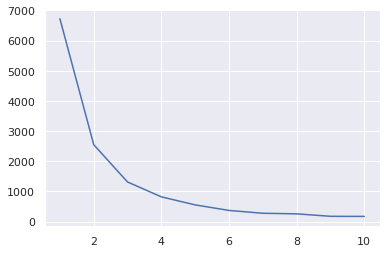

In [182]:
import matplotlib.pyplot as plt
plt.plot(range(1,11), distortions)

### elbow method sklearn

2
3853.324748628513


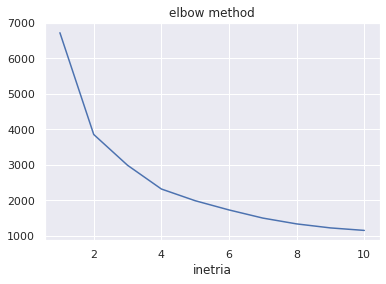

In [180]:
from sklearn.metrics import silhouette_score
scores = []
k = np.arange(1,11)
cost = []
for i in k:
    kmeans = KMeans(n_clusters = i, random_state = 0).fit(df.values)
    cost.append(kmeans.inertia_)
    #scores.append(silhouette_score(df.values, kmeans.labels_, metric = 'euclidean'))
sns.set()
plt.plot(k, cost)
plt.title("elbow method")
plt.xlabel("K")
plt.xlabel("inetria")


#4 best #of clusters = k of the elbow method
args = [0]
for i in range(len(cost)-1):
    args.append(cost[i]-(cost[i+1]))
argmax = max(args)
k = args.index(argmax) + 1
print(k)
print(cost[k-1])

## 6. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    
    - Complete-Linkage Clustering
    
    - Single-Linkage Clustering
    
    - Average-Linkage Clustering
    
    - Centroid Linkage Clustering
2- Distance function:
    
    - Euclidean Distance 
    
    - Manhattan Distance 
    
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

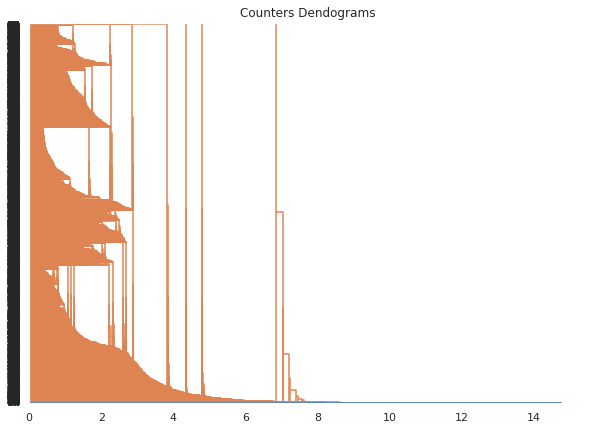

In [532]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df.values , method='single',metric= 'euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria                                                                                 #and metric with distance function


* this method makes the most fuses


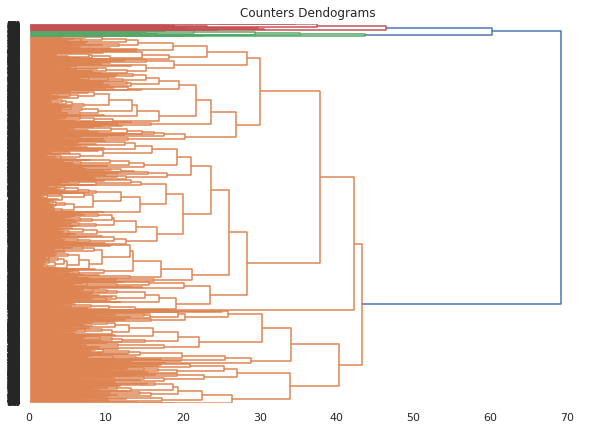

In [533]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df.values , method='complete',metric= 'euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
    #and metric with distance function

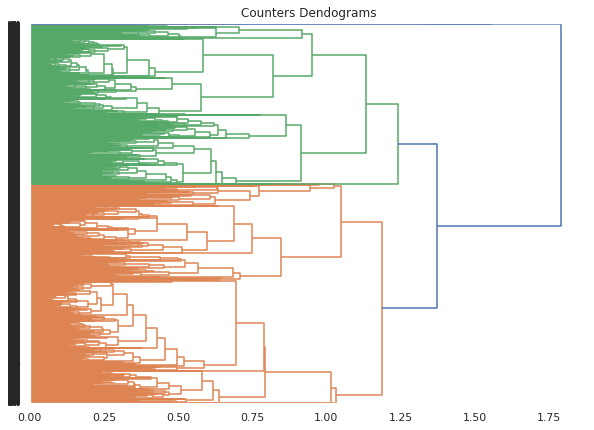

In [183]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df.values , method='average',metric= 'euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria                                                                                 #and metric with distance function


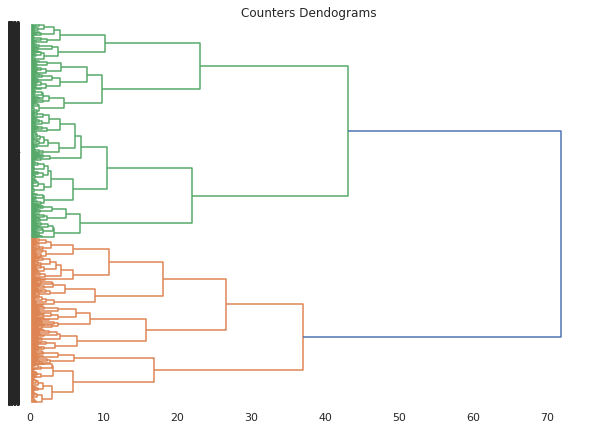

In [184]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df.values , method='ward',metric= 'euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria                                                                                 #and metric with distance function


changing the linkage criteria affects determining the optimal number of clusters by visualizing the data


In [194]:
#training
from sklearn.cluster import AgglomerativeClustering

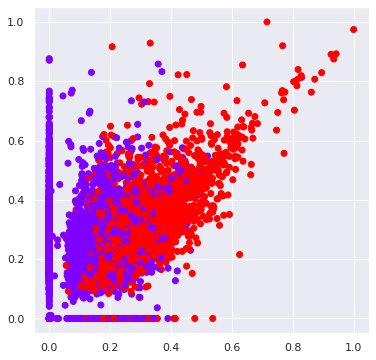

In [192]:
# 2 clusters
ac1 = AgglomerativeClustering(n_clusters = 2)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(df['PURCHASES'], df['PAYMENTS'], 
           c = ac1.fit_predict(df.values), cmap ='rainbow')
plt.show()

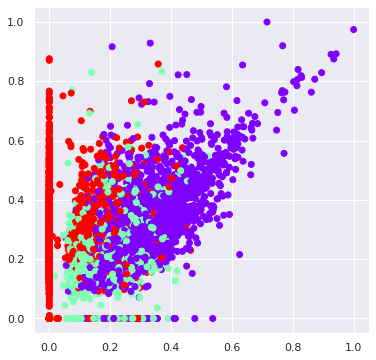

In [188]:
# 3 clusters
ac2 = AgglomerativeClustering(n_clusters = 3)
  
plt.figure(figsize =(6, 6))
plt.scatter(df['PURCHASES'], df['PAYMENTS'], 
           c = ac2.fit_predict(df.values), cmap ='rainbow')
plt.show()

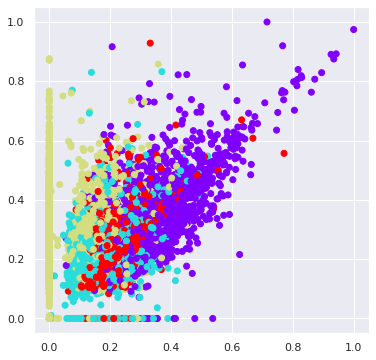

In [189]:
# 4 clusters
ac3 = AgglomerativeClustering(n_clusters = 4)
  
plt.figure(figsize =(6, 6))
plt.scatter(df['PURCHASES'], df['PAYMENTS'], 
           c = ac3.fit_predict(df.values), cmap ='rainbow')
plt.show()

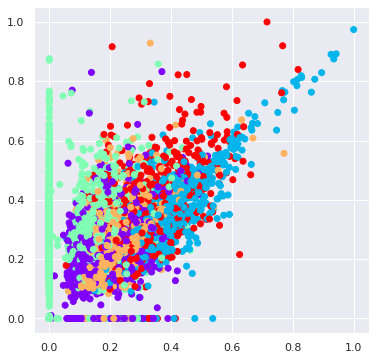

In [190]:
# 5 clusters
ac4 = AgglomerativeClustering(n_clusters = 5)
  
plt.figure(figsize =(6, 6))
plt.scatter(df['PURCHASES'], df['PAYMENTS'], 
           c = ac4.fit_predict(df.values), cmap ='rainbow')
plt.show()

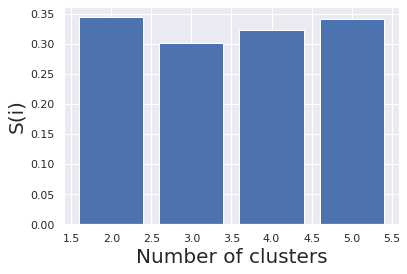

In [193]:
from sklearn.metrics import silhouette_score
k = [2, 3, 4, 5]
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(df.values, ac1.fit_predict(df.values)))
silhouette_scores.append(
        silhouette_score(df.values, ac2.fit_predict(df.values)))
silhouette_scores.append(
        silhouette_score(df.values, ac3.fit_predict(df.values)))
silhouette_scores.append(
        silhouette_score(df.values, ac4.fit_predict(df.values)))

# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

* then 2 clusters are enough

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

In [207]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
df.columns = ['P1', 'P2']

In [205]:
df

,P1,P2
0,-0.368392,-0.365619
1,-0.895662,-0.044433
2,0.413951,0.645350
3,-0.482614,0.304695
4,-0.391290,0.088682
...,...,...
8945,0.579880,-0.646704
8946,0.581135,-0.650493
8947,0.368064,-0.594370
8948,-0.791561,-0.237671


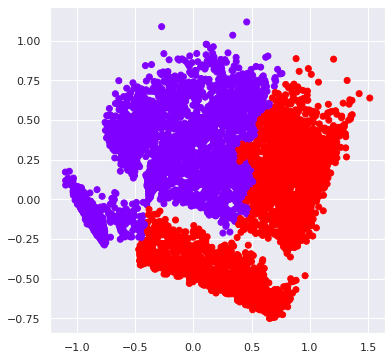

In [209]:
# 2 clusters
ac1 = AgglomerativeClustering(n_clusters = 2)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(df['P1'], df['P2'], 
           c = ac1.fit_predict(df.values), cmap ='rainbow')
plt.show()

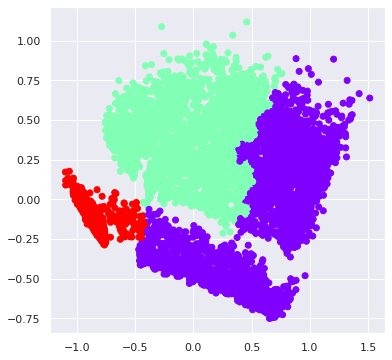

In [210]:
# 3 clusters
ac2 = AgglomerativeClustering(n_clusters = 3)
  
plt.figure(figsize =(6, 6))
plt.scatter(df['P1'], df['P2'], 
           c = ac2.fit_predict(df.values), cmap ='rainbow')
plt.show()

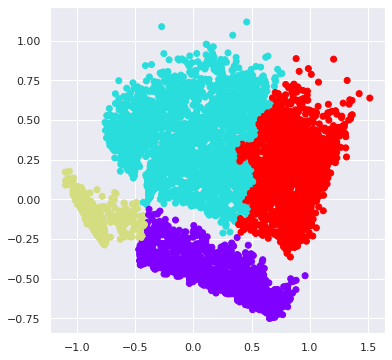

In [211]:
# 4 clusters
ac3 = AgglomerativeClustering(n_clusters = 4)
  
plt.figure(figsize =(6, 6))
plt.scatter(df['P1'], df['P2'], 
           c = ac3.fit_predict(df.values), cmap ='rainbow')
plt.show()

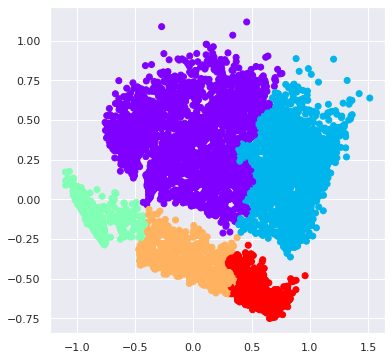

In [213]:
# 5 clusters
ac4 = AgglomerativeClustering(n_clusters = 5)
  
plt.figure(figsize =(6, 6))
plt.scatter(df['P1'], df['P2'], 
           c = ac4.fit_predict(df.values), cmap ='rainbow')
plt.show()

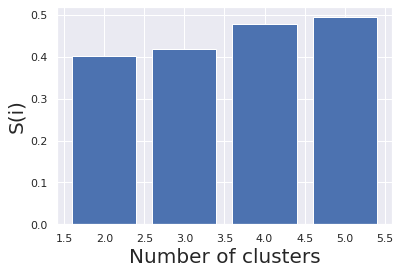

In [214]:
from sklearn.metrics import silhouette_score
k = [2, 3, 4, 5]
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(df.values, ac1.fit_predict(df.values)))
silhouette_scores.append(
        silhouette_score(df.values, ac2.fit_predict(df.values)))
silhouette_scores.append(
        silhouette_score(df.values, ac3.fit_predict(df.values)))
silhouette_scores.append(
        silhouette_score(df.values, ac4.fit_predict(df.values)))

# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()